
# Project: Investigate a Dataset (The TMDb database!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> **Tip**: This workspace is about the anaysis done on the dataset ('tmdb-movies.csv'). this dataset has been published by TMDb which contains a lot of information regarding the movies. 
in the below analysis, we have considered that our target is to check the relationships between independent variables (popularity, and vote_average) agaisnt some of the dependent variables (like spent budget, earned revenue, genres, runtime,...).


> The main target of this analysis is to show how can we improve movie popularity and its rating based on the provided data.
the points where we are going to run our analyis are below:

>  Q1- Is there a direct relationship between the popularity score of the movie and the spent budget?
   Q2- what is the relashipship between popularity score and vote_average?
   Q3- what is the most popular movie on that platform?
   Q4- how many genres in the dataset?
   


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
# Data Wrangling


In [4]:
# Import the dataset named 'tmdb-movies.csv'
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### The dataset has 10,866 entries and 21 columns.
I run a quick internet search regrading the meaning and siginifance oe each feature in order to decide whihc one could be removed without hurting the credability of the dataset.




### Columns to be discarded in our analysis:

Homepage: it won't affect the integrity of our analysis

Keywords: it's being used by TMDB search engine and consequntly won't affect audinece opinion.

Overview: it's being used by TMDB search engine and consequntly won't affect audinece opinion.

Tagline: it's being used by TMDB search engine and consequntly won't affect audinece opinion.

Release date and release year: it would be out of our scope to make any anlysis related to season/ date of the releae. this does not mean that date of release is not important, but it's our decesion not to touch it in this analysis.

budget_adg and revenue_adj: they are the revenue and budget based on 2010 USD value.
https://www.kaggle.com/tmdb/tmdb-movie-metadata/discussion/45990

In [5]:
# the list of Columns to be dropped during our analysis
drop_columns = ['imdb_id', 'cast', 'homepage', 'tagline','keywords', 'overview', 
                'release_date', 'release_year', 'budget_adj', 'revenue_adj']

In [6]:
df.drop(drop_columns, axis=1, inplace=True)


In [7]:
# Checking the dataset again after dropping the redundant columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


### Checking for Rows with Missing Value


In [8]:
df.isnull().sum()


id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
dtype: int64

There are 44 missing values in director column and 23 missing values in genres column and 1030 missing values in 
production_companies.

The percentage of feature with max no of missing items (production_companies) is around 10% which can be accepted without hampering the dataset integrity. 
so we are going to drop all the missing value rows for the three features listed above.


### Drop rows with missing values

In [9]:
df.dropna(inplace=True)

#check if all missing data rows have been succesfully deleted
df.isnull().sum().any()

False

### Drop Duplicates 

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)
# check if all duplcates have been succesfully removed
df.duplicated().any()

False

### Checking features against abnormal values

In [12]:
df.describe(include='all')

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average
count,9806.000000,9806.000000,9.806000e+03,9.806000e+03,9806,9806,9806.000000,9806,9806,9806.000000,9806.000000
unique,NaN,NaN,NaN,NaN,9546,4521,NaN,1921,7423,NaN,NaN
top,NaN,NaN,NaN,NaN,Hamlet,Woody Allen,NaN,Drama,Paramount Pictures,NaN,NaN
freq,NaN,NaN,NaN,NaN,4,42,NaN,638,156,NaN,NaN
mean,63287.653783,0.693143,1.612525e+07,4.407785e+07,NaN,NaN,102.744340,NaN,NaN,238.622578,5.966459
std,90808.473021,1.035525,3.216819e+07,1.224038e+08,NaN,NaN,28.134561,NaN,NaN,602.081472,0.914291
min,5.000000,0.000188,0.000000e+00,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,10.000000,1.500000
25%,10247.500000,0.231581,0.000000e+00,0.000000e+00,NaN,NaN,90.000000,NaN,NaN,18.000000,5.400000
50%,18725.500000,0.418755,1.403930e+05,0.000000e+00,NaN,NaN,100.000000,NaN,NaN,46.000000,6.000000
75%,70586.750000,0.774232,1.900000e+07,3.064621e+07,NaN,NaN,112.000000,NaN,NaN,172.000000,6.600000


### Dependent Variables

Popularity & vote_average:
popularity would be considered one of the dependent variable in our analysis along with the vote_average. the reason behind this is that assuming our goal is to analyze the most required attributes for a movie to get popular (please check the link https://developers.themoviedb.org/3/getting-started/popularity) and at the same time to get reasonable vote_average.

I did not consder the vote_count here as a separate dependent variable as its effect is taken into popularuty.


### Independent Variables

we are going to consider the following independent variables in our study:
budget, revenue, runtime, genres,  production_companies.

from the above descriptive data of all featres we can see:
revenue, budget and runtime have many rows with 0 value


In [13]:
# check 0 values for budget column
df.query('budget == 0').count()

id                      4777
popularity              4777
budget                  4777
revenue                 4777
original_title          4777
director                4777
runtime                 4777
genres                  4777
production_companies    4777
vote_count              4777
vote_average            4777
dtype: int64

In [14]:
# check 0 values for revenue column
df.query('revenue == 0').count()

id                      5054
popularity              5054
budget                  5054
revenue                 5054
original_title          5054
director                5054
runtime                 5054
genres                  5054
production_companies    5054
vote_count              5054
vote_average            5054
dtype: int64

In [15]:
# check 0 values for runtime column
df.query('runtime == 0').count()

id                      13
popularity              13
budget                  13
revenue                 13
original_title          13
director                13
runtime                 13
genres                  13
production_companies    13
vote_count              13
vote_average            13
dtype: int64

as the number of runtime = 0 rows is quite negligible, we shall drop them out without any effect on dataset integrity.

In [16]:
# drop all rows where runtime = 0
df.drop(df.loc[df['runtime']==0].index, inplace=True)


In [17]:
df.query('runtime == 0').count()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
dtype: int64

### Filling the rows with budget = 0  and revenue = 0 by the mean value


In [18]:
# first replacing the 0 by na in order not to dilute the value of mean by so many zeros
cols = ['budget', 'revenue']
df[cols] = df[cols].replace({0:np.nan})

In [19]:
# Filing budget = na & revenue = na rows with mean of buget and revenuw respectivley.
df['budget'].fillna((df['budget'].mean()), inplace=True)
df['revenue'].fillna((df['revenue'].mean()), inplace=True)


In [20]:
# Checking no zero values in both budget and revenue
df.query('budget == 0').count()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
dtype: int64

In [21]:
# Checking no zero values in both budget and revenue
df.query('revenue == 0').count()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
dtype: int64

In [22]:
df.shape

(9793, 11)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Generating a general scattring matrix

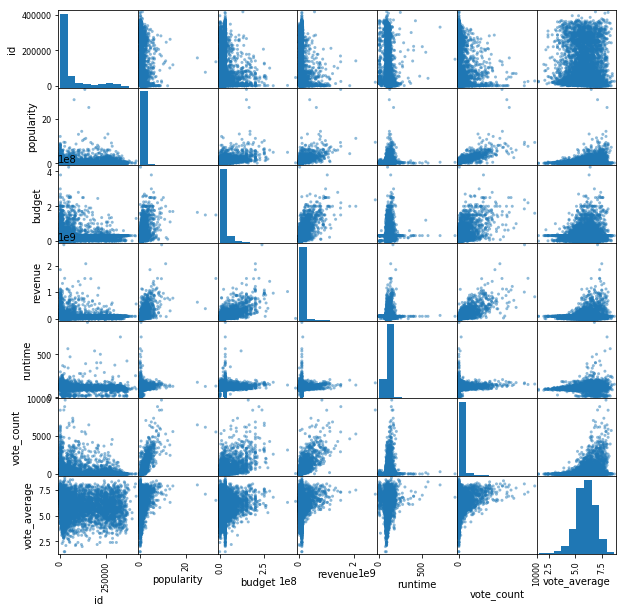

In [23]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

### Single variables examination

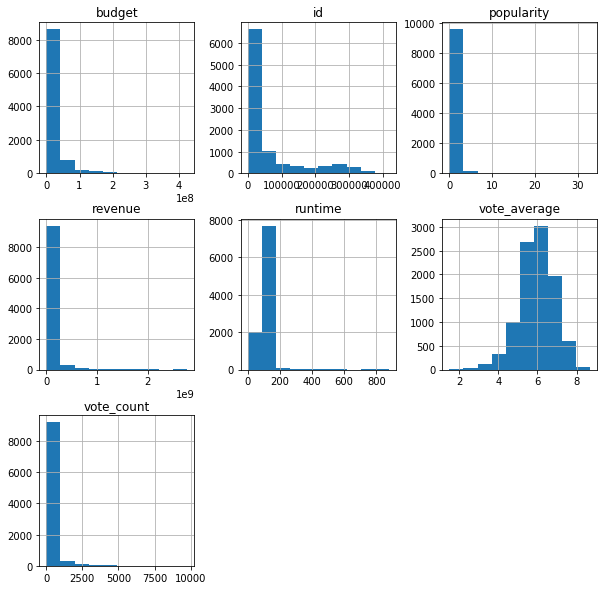

In [51]:
df.hist(figsize=(10,10));

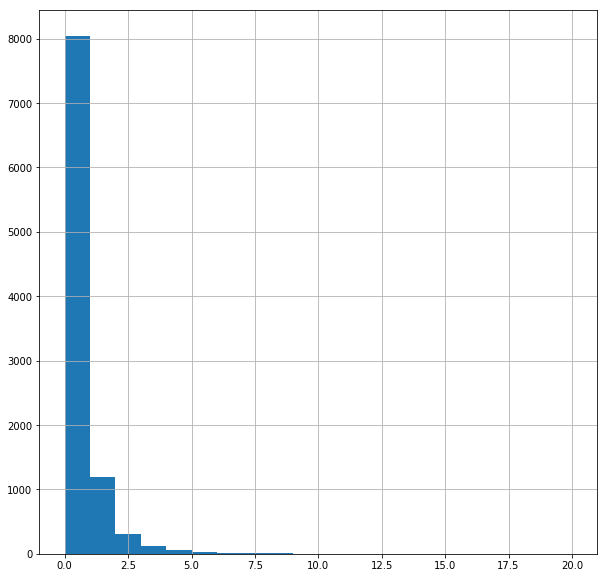

In [52]:
df['popularity'].hist(bins= 20, figsize= (10,10), range=(0, 20));

Popularity is far from being normally distributed and it's left skewed

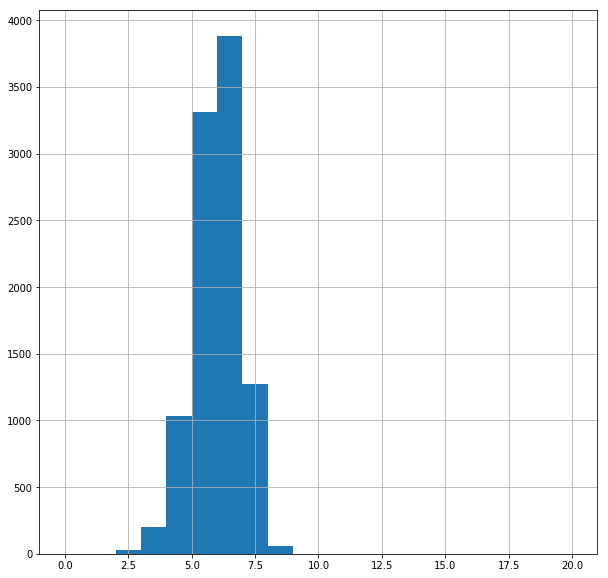

In [53]:
df['vote_average'].hist(bins= 20, figsize= (10,10), range=(0, 20));

Vote_average is alomt normall distributed.

### as we are going to use scatter plot extensively, we shall make a function for that reason

In [54]:
def scatter_plot(df, col_1, col_2, title, x_label, y_label):
    plt.scatter(df[col_1], df[col_2])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);


### Q1- Is there a direct relationship between the popularity score of the movie and the spent budget?

as we can see from the above plot, there is a direct relationship between spent budget and movie popularity. there is a solid regression relationship between them as may be learer with the below scatter graph.


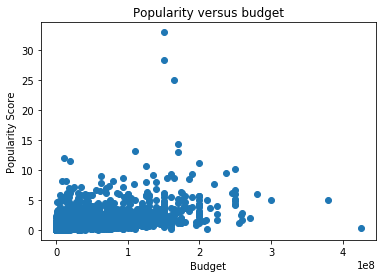

In [55]:
scatter_plot(df, 'budget', 'popularity', "Popularity versus budget", 'Budget', 'Popularity Score')


So there is a certain correlation between movie popularity and the spent budget to produce the movie.
There are some outliers in the dataset. to imporve the relationship, we must drop such outliers.

###   Q2- what is the relashipship between popularity score and vote_average?

As we can see from the scatter matrix above, there is a direct relationship between vote_average and movie popularity. there is a solid regression relationship between them as may be learer with the below scatter graph.


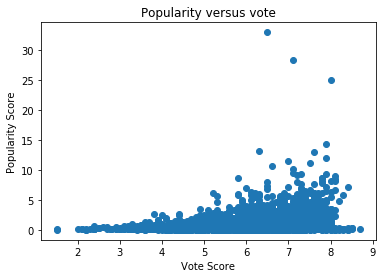

In [56]:
scatter_plot(df, 'vote_average', 'popularity', "Popularity versus vote", 'Vote Score', 'Popularity Score')

###     Q3- what is the most popular movie on that platform?

In [57]:
most_pop = df['popularity'].max()
most_pop

32.985762999999999

In [58]:
df[df['popularity'] == most_pop]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5


we have figured out that Hurassic World is the most populr movie on that platform

###   Q4- how many genres in the dataset?

In [59]:
genre_counts = df.genres.value_counts()

In [60]:
genre_counts

Drama                                               638
Comedy                                              614
Drama|Romance                                       272
Comedy|Drama                                        255
Comedy|Romance                                      248
Horror|Thriller                                     243
Horror                                              229
Comedy|Drama|Romance                                203
Documentary                                         195
Drama|Thriller                                      128
Comedy|Family                                        97
Action|Thriller                                      92
Thriller                                             88
Drama|Comedy                                         85
Crime|Drama|Thriller                                 76
Animation|Family                                     76
Crime|Drama                                          69
Comedy|Horror                                   

### Q5- The relationship between the budget and revenue of a movie

As we can see from the scatter matrix above, there is a direct relationship between budget and movie revenue. there is a solid regression relationship between them as may be learer with the below scatter graph.

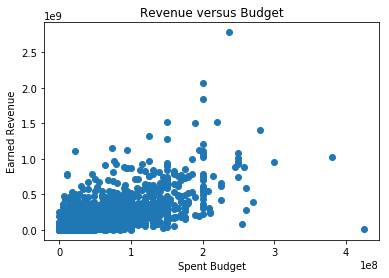

In [63]:
scatter_plot(df, 'budget', 'revenue', "Revenue versus Budget", 'Spent Budget', 'Earned Revenue')

So, there are a very strong relashipship between the budget spent to produce a movie and the revenue generated by this movie.


<a id='conclusions'></a>
## Conclusions

we have found a solid relationship (which can be modeled as a regression model) between popularity and the budget spent. also we found such strong relationship between popularity and the vote_average.
the dataset was rich in data, but in the other hand - as usual - it has many missing values especially for budget, revenue columns. we had to fill in these missing values (or zero value) records with the average of each column respetively.
this action of course had some degrading effects on the integrity of dataset. 
finally, the correlation between the budget spent and revenue is quite strong and could be modeled as a simple linear regression model with acceptable accuracy.

## Analysis Limitations:

the dataset has an adequate size to draw a conclusion. the number of valid entries (no missing values, no duplicates, no out of normal range) were very resonable.
the only darwback in this dataset was the zero value entries for budget, revenue variables. we had to fill them in using the mean value of each variable respectively. aside form this, dataset was quite good and rich.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0